# Dự đoán giá cổ phiếu sử dụng LSTM

## LSTM
- LSTM: là một phiên bản cải tiến của mạng nơ-ron tuần hoàn (RNN) nhằm giải quyết vấn đề nhớ các bước dài của RNN.

In [40]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
url = 'https://raw.githubusercontent.com/daoducnghia/Stock-prediction/master/AAPL10K.csv'

data = pd.read_csv(url)
print(data.shape)
# data.head()

(10633, 7)


In [42]:
data1=data.reset_index()['Open']
data1

0          0.128348
1          0.122210
2          0.113281
3          0.115513
4          0.118862
            ...    
10628    153.880005
10629    153.779999
10630    149.460007
10631    150.949997
10632    152.119995
Name: Open, Length: 10633, dtype: float64

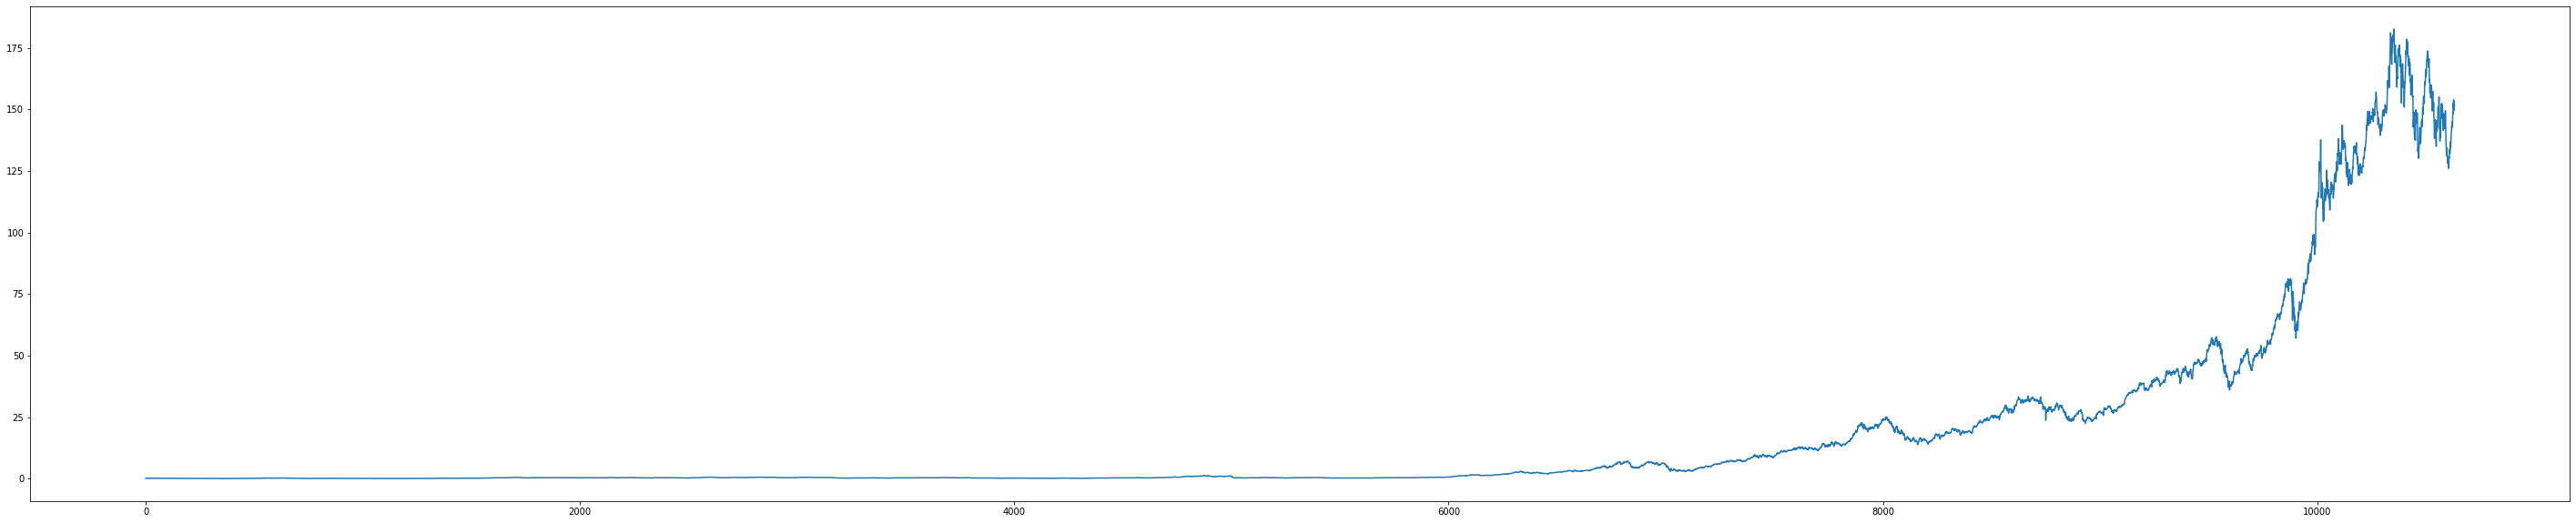

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
plt.plot(data1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))
data1

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [8.18326562e-01],
       [8.26487299e-01],
       [8.32895426e-01]])

In [46]:
##splitting dataset into train and test split
training_size=int(len(data1)*0.8)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [47]:
training_size,test_size

(8506, 2127)

In [48]:
train_data

array([[0.00043095],
       [0.00039733],
       [0.00034843],
       ...,
       [0.14057009],
       [0.14084394],
       [0.14089871]])

In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(8445, 60)
(8445,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(2066, 60)
(2066,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

60

In [79]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
#Dropout bỏ qua 20% unit bất kì
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#thuật toán tối ưu là thuật toán để cải thiện weight và bias theo từng bước
#adam thuật toán tối ưu tìm cực tiểu toàn cục

In [80]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
#Epochs: Một Epoch được tính là khi chúng ta đưa tất cả dữ liệu trong tập train vào mạng neural network 1 lần
#Batch size là số lượng mẫu dữ liệu trong một lần huấn luyện.

Epoch 1/100
132/132 [==============================] - 9s 24ms/step - loss: 7.0667e-05 - val_loss: 0.0073
Epoch 2/100
132/132 [==============================] - 2s 14ms/step - loss: 4.4149e-06 - val_loss: 0.0094
Epoch 3/100
132/132 [==============================] - 1s 11ms/step - loss: 3.6146e-06 - val_loss: 0.0064
Epoch 4/100
132/132 [==============================] - 2s 11ms/step - loss: 3.9974e-06 - val_loss: 0.0062
Epoch 5/100
132/132 [==============================] - 2s 11ms/step - loss: 3.3384e-06 - val_loss: 0.0048
Epoch 6/100
132/132 [==============================] - 2s 11ms/step - loss: 3.4629e-06 - val_loss: 0.0050
Epoch 7/100
132/132 [==============================] - 2s 11ms/step - loss: 3.4802e-06 - val_loss: 0.0038
Epoch 8/100
132/132 [==============================] - 2s 12ms/step - loss: 3.2592e-06 - val_loss: 0.0044
Epoch 9/100
132/132 [==============================] - 2s 15ms/step - loss: 3.1921e-06 - val_loss: 0.0035
Epoch 10/100
132/132 [========================

In [82]:
import tensorflow as tf

'2.11.0'

In [83]:
### The prediction and check performance metrics
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

65/65 [==============================] - 0s 4ms/step


In [84]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [85]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6.464447410541333

In [86]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

85.45721865679685

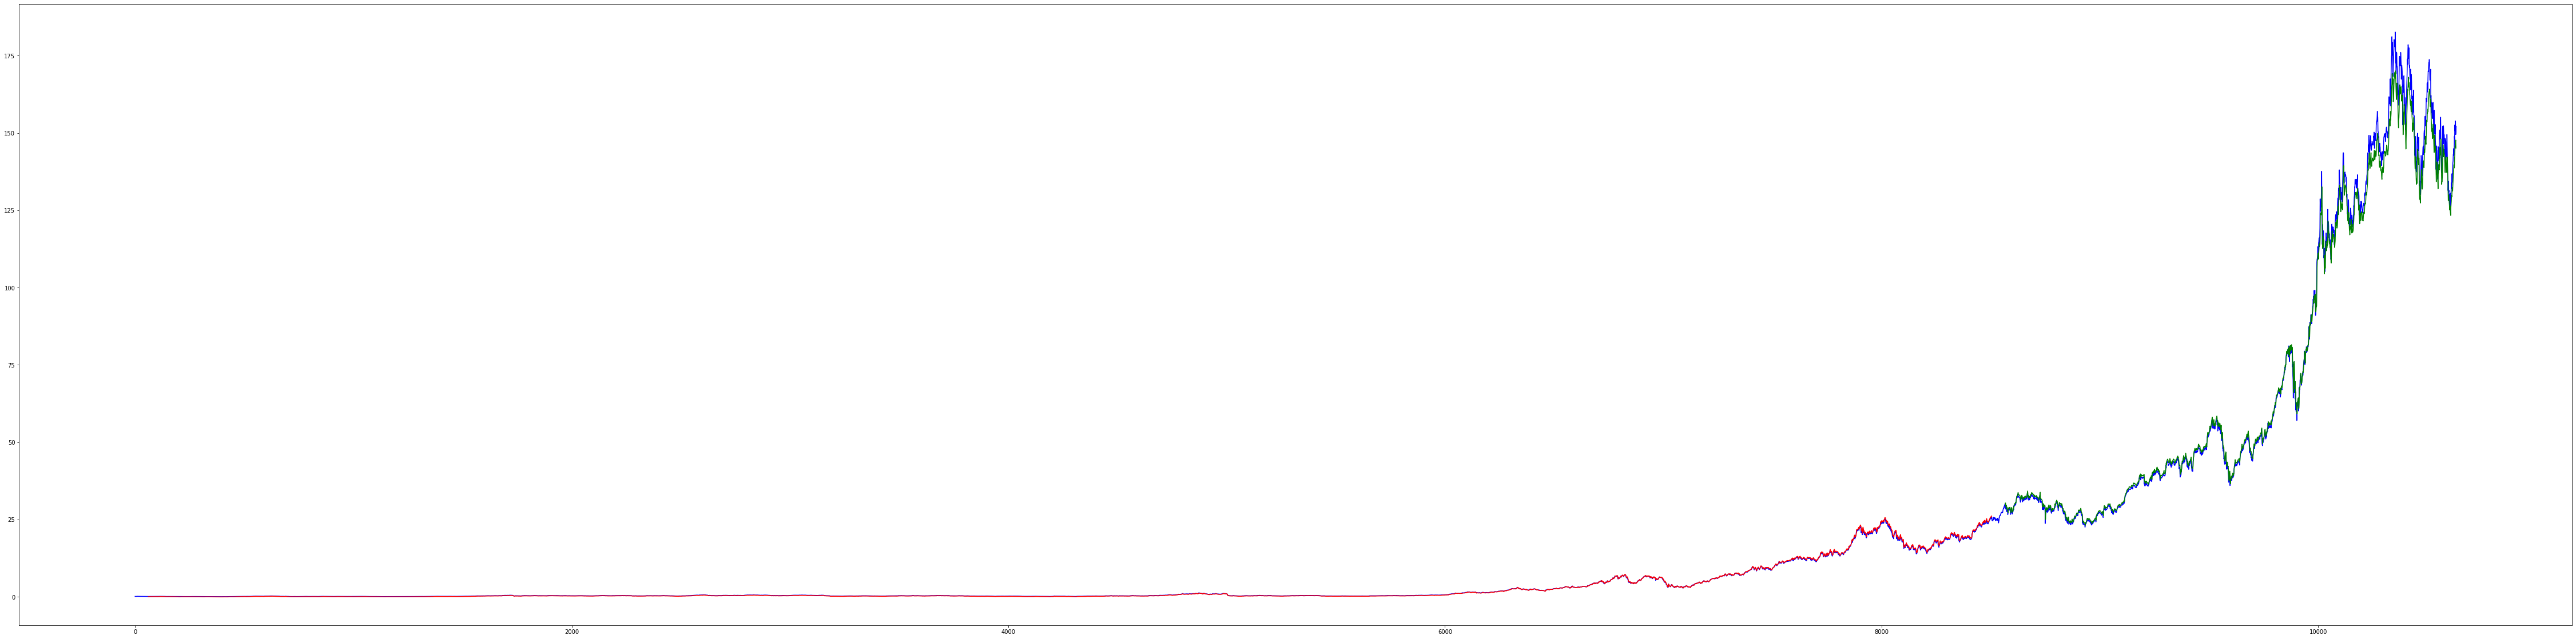

In [91]:
# Part 3 - Making the predictions and visualising the results
### Plotting 
# shift train predictions for plotting
look_back=60
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(80,20))
plt.plot(scaler.inverse_transform(data1),color='blue', label='data1')
plt.plot(trainPredictPlot, color='red', label='train')
plt.plot(testPredictPlot,color='green', label='test')
plt.show()

In [148]:
#Part 4 Predict next 30 day
len(test_data)

2127

In [149]:
x_input=test_data[2127-60:].reshape(1,-1)
x_input.shape

(1, 60)

In [150]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [151]:
temp_input

[0.8017310516564927,
 0.8339360798648968,
 0.8221604746710406,
 0.8110420870067391,
 0.8182717372527623,
 0.8120279160395911,
 0.7946657016850773,
 0.7900101840099543,
 0.7741815411232118,
 0.8114802612373271,
 0.7991569190855926,
 0.8090703467854206,
 0.805236434547115,
 0.7785084472950373,
 0.7794395387805719,
 0.7793299705762406,
 0.7813017107975591,
 0.8185456057317014,
 0.7958159186251926,
 0.772593237585164,
 0.7483847220352421,
 0.7397309918472055,
 0.7193563885355893,
 0.7280648672250254,
 0.7355684681056022,
 0.7167821738090749,
 0.7193016509882718,
 0.7099358726136669,
 0.7007344438070385,
 0.7030348338709413,
 0.7132768730740671,
 0.6947097042321205,
 0.696024183107557,
 0.6898899246216761,
 0.7143175218098509,
 0.7131673103467767,
 0.7185896082787446,
 0.7329942533790879,
 0.7228616947476383,
 0.7381974258564751,
 0.7490967647447694,
 0.7340896451392303,
 0.740662077855699,
 0.7562168522635021,
 0.76821158838898,
 0.7713882776206901,
 0.7838759255240734,
 0.7838211879767558

In [152]:
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79654044]
61
1 day input [0.83393608 0.82216047 0.81104209 0.81827174 0.81202792 0.7946657
 0.79001018 0.77418154 0.81148026 0.79915692 0.80907035 0.80523643
 0.77850845 0.77943954 0.77932997 0.78130171 0.81854561 0.79581592
 0.77259324 0.74838472 0.73973099 0.71935639 0.72806487 0.73556847
 0.71678217 0.71930165 0.70993587 0.70073444 0.70303483 0.71327687
 0.6947097  0.69602418 0.68988992 0.71431752 0.71316731 0.71858961
 0.73299425 0.72286169 0.73819743 0.74909676 0.73408965 0.74066208
 0.75621685 0.76821159 0.77138828 0.78387593 0.78382119 0.79367988
 0.78130171 0.78825757 0.81525935 0.81049435 0.83536016 0.82478943
 0.84253507 0.84198734 0.81832656 0.8264873  0.83289543 0.79654044]
1 day output [[0.77708334]]
2 day input [0.82216047 0.81104209 0.81827174 0.81202792 0.7946657  0.79001018
 0.77418154 0.81148026 0.79915692 0.80907035 0.80523643 0.77850845
 0.77943954 0.77932997 0.78130171 0.81854561 0.79581592 0.77259324
 0.74838472 0.73973099 0.71935639 0.72806487 0.73556847 0.716

In [153]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [154]:
scaler.inverse_transform(lst_output)

array([[145.4822892 ],
       [141.92980493],
       [137.9593839 ],
       [134.12799943],
       [130.56788644],
       [127.34424279],
       [124.47483984],
       [121.94325569],
       [119.71198877],
       [117.7338302 ],
       [115.96050461],
       [114.34863382],
       [112.8628166 ],
       [111.47673875],
       [110.1724439 ],
       [108.93902767],
       [107.77066783],
       [106.66480698],
       [105.62062891],
       [104.63781802],
       [103.71579755],
       [102.85334862],
       [102.04838178],
       [101.29810018],
       [100.59915198],
       [ 99.94785885],
       [ 99.34041185],
       [ 98.77308914],
       [ 98.24240826],
       [ 97.74519149]])

In [155]:
len(data1)

10633

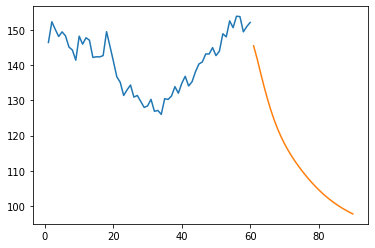

In [156]:
plt.plot(day_new,scaler.inverse_transform(data1[10633-60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))